## Useful Data from yfinance
Here’s what you can extract from yfinance to aid your decision-making:

### 1. Historical Stock Prices
What to Look For:
- Volatility patterns: High volatility might indicate higher risk and potential reward.
- Price trends: Consistent growth over time is a positive sign.


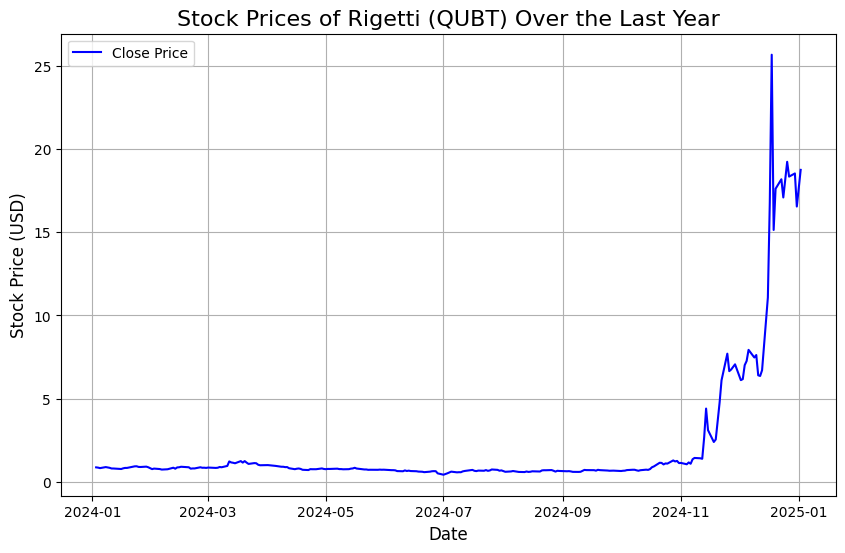

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import textwrap

# Fetch the stock data
ticker = 'QUBT'
stock = yf.Ticker("QUBT")  # Rigetti Computing
history = stock.history(period="1y")  # Get 1-year data

# Plot the "Close" price
plt.figure(figsize=(10, 6))
plt.plot(history.index, history["Close"], label="Close Price", color="blue")
plt.title("Stock Prices of Rigetti (QUBT) Over the Last Year", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.legend()
plt.grid()
plt.show()

### 2. Financial Statements
- Income Statement:
  - Revenue growth: Look for consistent or accelerating revenue.
  - Profit margins: A company transitioning from losses to profits signals growth.
- Balance Sheet:
  - Debt-to-equity ratio: Low ratios indicate manageable debt levels.
  - Cash reserves: Ensure the company has sufficient cash for operations and growth.
- Cash Flow Statement:
  - Positive operating cash flow is a healthy indicator.

In [13]:
financials = stock.financials  # Income Statement
print(financials)

                                                    2023-12-31  2022-12-31  \
Tax Effect Of Unusual Items                                0.0         0.0   
Tax Rate For Calcs                                         0.0         0.0   
Normalized EBITDA                                  -22641000.0 -26735000.0   
Total Unusual Items                                   528000.0   3392000.0   
Total Unusual Items Excluding Goodwill                528000.0   3392000.0   
Net Income From Continuing Operation Net Minori... -27022000.0 -25978000.0   
Reconciled Depreciation                              3307000.0   1863000.0   
Reconciled Cost Of Revenue                            196000.0     61000.0   
EBITDA                                             -22113000.0 -23343000.0   
EBIT                                               -25420000.0 -25206000.0   
Net Interest Income                                 -1307000.0   -725000.0   
Interest Expense                                     1602000.0  

In [14]:
balance_sheet = stock.balance_sheet  # Balance Sheet
print(balance_sheet)

                                                  2023-12-31  2022-12-31  \
Ordinary Shares Number                            77451356.0  55963334.0   
Share Issued                                      77451356.0  55963334.0   
Net Debt                                            437195.0   1880000.0   
Total Debt                                         2765000.0   8266000.0   
Tangible Book Value                                1055000.0  -5629000.0   
...                                                      ...         ...   
Receivables                                         344000.0     13000.0   
Loans Receivable                                    279000.0         0.0   
Accounts Receivable                                  65000.0     13000.0   
Cash Cash Equivalents And Short Term Investments   2059000.0   5308000.0   
Cash And Cash Equivalents                          2059000.0   5308000.0   

                                                  2021-12-31  2020-12-31  
Ordinary Sha

In [15]:
cashflow = stock.cashflow  # Cash Flow
print(cashflow)

                                                2023-12-31  2022-12-31  \
Free Cash Flow                                 -20427000.0 -16248000.0   
Repayment Of Debt                               -6187000.0         0.0   
Issuance Of Debt                                       0.0   6960000.0   
Issuance Of Capital Stock                       24730000.0         0.0   
Capital Expenditure                             -2112000.0   -870000.0   
Interest Paid Supplemental Data                   813000.0         0.0   
Income Tax Paid Supplemental Data                      0.0         0.0   
End Cash Position                                2059000.0   5308000.0   
Beginning Cash Position                          5308000.0  16739000.0   
Changes In Cash                                 -3249000.0 -11431000.0   
Financing Cash Flow                             17678000.0   6173000.0   
Cash Flow From Continuing Financing Activities  17678000.0   6173000.0   
Net Other Financing Charges           

### 3. Key Ratios
+ Price-to-Earnings (P/E) Ratio:
  + Low P/E ratios can indicate undervaluation.
+ Price-to-Sales (P/S) Ratio:
  + Useful for companies with low or no earnings. Look for values below 3.
+ Debt-to-Equity (D/E) Ratio:
  + Avoid companies with excessive debt.

In [4]:
info = stock.info
print(f"P/E Ratio: {info.get('trailingPE')}")
print(f"P/S Ratio: {info.get('priceToSalesTrailing12Months')}")
print(f"D/E Ratio: {info.get('debtToEquity')}")

P/E Ratio: None
P/S Ratio: 6266.0156
D/E Ratio: 12.924


### 4. Insider Transactions
What to Look For:
+ Insider buying: Indicates confidence in the company’s future.
+ Insider selling: May be a red flag.

In [5]:
insider = stock.get_insider_transactions()
print(insider)

   Shares   Value URL                                         Text  \
0  259700       0      Stock Award(Grant) at price 0.00 per share.   
1   75000       0              Stock Gift at price 0.00 per share.   
2  168000       0      Stock Award(Grant) at price 0.00 per share.   
3   15000   16500                    Sale at price 1.10 per share.   
4   15000   18300                    Sale at price 1.22 per share.   
5   15000   18300                    Sale at price 1.22 per share.   
6  100000  128000                    Sale at price 1.28 per share.   
7   71445  106052             Sale at price 1.18 - 2.19 per share.   
8   76300       0      Stock Award(Grant) at price 0.00 per share.   
9   83200       0      Stock Award(Grant) at price 0.00 per share.   

                     Insider                                Position  \
0       BOEHMLER CHRISTOPHER                 Chief Financial Officer   
1         LISCOUSKI ROBERT P                                Director   
2         LIS

### 5. Analyst Ratings
What to Look For:
+ Consensus ratings: “Buy” or “Strong Buy” ratings indicate positive sentiment.
+ Target prices: Compare the current price with analyst targets to assess upside potential.

In [6]:
print(info.get("recommendationKey"))  # Overall recommendation
print(info.get("targetMeanPrice"))  # Average target price

none
8.5


### 6. Dividends and Splits
What to Look For:
+ Dividend-paying small-caps offer income in addition to growth potential.
+ Splits can indicate company confidence and growth.

In [7]:
dividends = stock.dividends
print(dividends)

Series([], Name: Dividends, dtype: float64)


### 7. Sector and Competitor Analysis
What to Look For:
+ Compare performance within the same sector.
+ Check competitors for relative valuation and growth.

In [8]:
print(info.get("sector"))  # Company sector
print(info.get("industry"))  # Industry category

Technology
Computer Hardware


In [9]:
print(f"Business Summary: {textwrap.fill(info.get('longBusinessSummary'), width=160)} \n")

Business Summary: Quantum Computing Inc., an integrated photonics company, offers accessible and affordable quantum machines. The company offers Dirac systems are portable, low
power, and room temperature qubit and qudit entropy quantum computers (EQC); reservoir computing; remote sensing; and single photon imaging. It also provides
Quantum random number generator (uQRNG), a portable device that provides genuine random numbers directly from quantum processes; and quantum authentication
which eliminates vulnerabilities inherent in classical cryptographic schemes by offering a comprehensive entanglement-based quantum cyber solution that
seamlessly integrates into existing telecom fiber and communication infrastructure. The company was formerly known as Innovative Beverage Group Holdings, Inc.
Quantum Computing, Inc. was incorporated in 2018 and is based in Hoboken, New Jersey. 



In [10]:
# Extract key attributes
key_attributes = {
    "Location": info.get('city') + ", " + info.get("state"),
    "Sector": info.get("sector"),
    "Industry": info.get("industry"),
    "Market Capitalization": info.get("marketCap"),
    "Total Revenue": info.get("totalRevenue"),
    "Revenue Growth": info.get("revenueGrowth"),
    "Gross Margins": info.get("grossMargins"),
    "Operating Margins": info.get("operatingMargins"),
    "Total Debt": info.get("totalDebt"),
    "Debt-to-Equity Ratio": info.get("debtToEquity"),
    "Free Cash Flow": info.get("freeCashflow"),
    "Operating Cash Flow": info.get("operatingCashflow"),
    "Price-to-Sales Ratio (TTM)": info.get("priceToSalesTrailing12Months"),
    "Price-to-Book Ratio": info.get("priceToBook"),
    "Insider Ownership (%)": info.get("heldPercentInsiders"),
    "Institutional Ownership (%)": info.get("heldPercentInstitutions"),
    "Full-Time Employees": info.get("fullTimeEmployees"),
    "Trailing EPS": info.get("trailingEps"),
    "Forward EPS": info.get("forwardEps"),
    "Target Mean Price": info.get("targetMeanPrice")
}

# Print the attributes in a nice bullet point format
print(f"Key Information for {ticker}:\n")
for key, value in key_attributes.items():
    if value is not None:
        print(f"- {key}: {value}")
    else:
        print(f"- {key}: Data not available")


Key Information for QUBT:

- Location: Hoboken, NJ
- Sector: Technology
- Industry: Computer Hardware
- Market Capitalization: 2418682112
- Total Revenue: 386000
- Revenue Growth: 1.02
- Gross Margins: 0.22798
- Operating Margins: -53.841583
- Total Debt: 7811000
- Debt-to-Equity Ratio: 12.924
- Free Cash Flow: -10711687
- Operating Cash Flow: -17406000
- Price-to-Sales Ratio (TTM): 6266.0156
- Price-to-Book Ratio: 29.304688
- Insider Ownership (%): 0.21836
- Institutional Ownership (%): 0.033269998
- Full-Time Employees: 39
- Trailing EPS: -0.24
- Forward EPS: -0.31
- Target Mean Price: 8.5


In [11]:
import pandas as pd

# Convert the stock info dictionary into a DataFrame
stock_table = pd.DataFrame(info.items(), columns=["Attribute", "Value"])

# Display the table
print(stock_table)

# Save the table to a CSV file (optional)
stock_table.to_csv("stock_info.csv", index=False)


             Attribute                Value
0             address1  5 Marine View Plaza
1             address2            Suite 214
2                 city              Hoboken
3                state                   NJ
4                  zip                07030
..                 ...                  ...
105      revenueGrowth                 1.02
106       grossMargins              0.22798
107   operatingMargins           -53.841583
108  financialCurrency                  USD
109   trailingPegRatio                 None

[110 rows x 2 columns]


In [12]:
import yfinance as yf

# Specify the stock ticker
ticker = "QUBT"  # Example for Rigetti Computing

# Fetch the stock information
stock = yf.Ticker(ticker)

# Get major holders
major_holders = stock.major_holders
print("Major Holders:")
print(major_holders)

# Get institutional holders
institutional_holders = stock.institutional_holders
if institutional_holders is not None:
    print("\nInstitutional Holders:")
    print(institutional_holders)
else:
    print("\nInstitutional holders data is not available for this stock.")

# Get mutual fund holders (if available)
mutual_fund_holders = stock.mutualfund_holders
if mutual_fund_holders is not None:
    print("\nMutual Fund Holders:")
    print(mutual_fund_holders)
else:
    print("\nMutual fund holders data is not available for this stock.")


Major Holders:
Breakdown                        Value
insidersPercentHeld            0.21836
institutionsPercentHeld        0.03327
institutionsFloatPercentHeld   0.04257
institutionsCount             37.00000

Institutional Holders:
  Date Reported                                Holder  pctHeld   Shares  \
0    2023-06-30                    Vanguard Group Inc   0.0415  1206864   
1    2023-06-30                        Blackrock Inc.   0.0131   380968   
2    2023-06-30         Geode Capital Management, LLC   0.0131   379527   
3    2023-06-30  Susquehanna International Group, LLP   0.0046   133561   
4    2023-09-30           SG Americas Securities, LLC   0.0040   115877   
5    2023-09-30                          Wpwealth Llp   0.0034   100000   
6    2023-06-30             Millennium Management Llc   0.0028    81913   
7    2023-06-30              State Street Corporation   0.0027    77832   
8    2023-06-30                 Peak6 Investments Llc   0.0020    59332   
9    2023-06-30 